In [1]:
#importing sweetviz
#import sweetviz as sv
#analyzing the dataset
#advert_report = sv.analyze(dataframe1)
#display the report
#advert_report.show_html('Advertising.html')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
import imblearn
pd.options.display.max_columns = None


In [2]:
##CARGA DE DATAFRAME
dataframe1 = pd.read_csv('weatherAUS.csv')
dataframe1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
##DIMENSIONES DATAFRAME
dataframe1.shape

(142193, 24)

In [4]:
##DESCRIPCION DATAFRAME
dataframe1.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [5]:
##DESCRIPCION DE DATAFRAME CON VARIABLES NO NUMERICAS
dataframe1.describe(include=['object'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,142193,142193,132863,132180,138415,140787,142193
unique,3436,49,16,16,16,2,2
top,2013-12-01,Canberra,W,N,SE,No,No
freq,49,3418,9780,11393,10663,109332,110316


In [6]:
##CAMBIO DE FECHA POR ESTACION PARA POSTERIOR ANALISIS
dataframe1['Date'] = pd.to_datetime(dataframe1['Date'])
dataframe1['Month'] = dataframe1['Date'].dt.month
dataframe1['Estacion'] = dataframe1['Month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Verano', 'Verano', 'Otoño', 'Otoño', 'Otoño', 'Invierno', 'Invierno', 'Invierno', 'Primavera', 'Primavera', 'Primavera', 'Verano'))
dataframe1.drop('Date', axis = 1, inplace = True)
dataframe1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Month,Estacion
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,12,Verano
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,12,Verano
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,12,Verano
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,12,Verano
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,12,Verano


In [7]:
#DIVISION DE DATAFRAME SEGUN TIPO DE VALOR, PARA ANALISIS
df_num = dataframe1.select_dtypes(include=[np.float64])
df_obj = dataframe1.select_dtypes(include=[np.object])

C:\Users\Vicente\AppData\Local\Temp/ipykernel_13544/3994376429.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_obj = dataframe1.select_dtypes(include=[np.object])


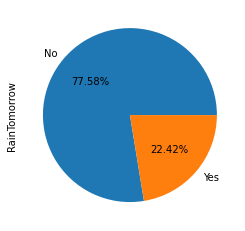

In [8]:
##VISUALIZACION DE DISTRIBUCION DE OBSERVACIONES PARA VER SI LLUEVE MAÑANA O NO.
df_obj['RainTomorrow'].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()

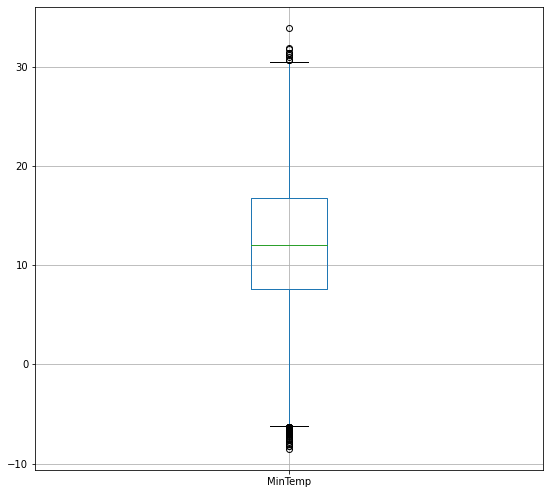

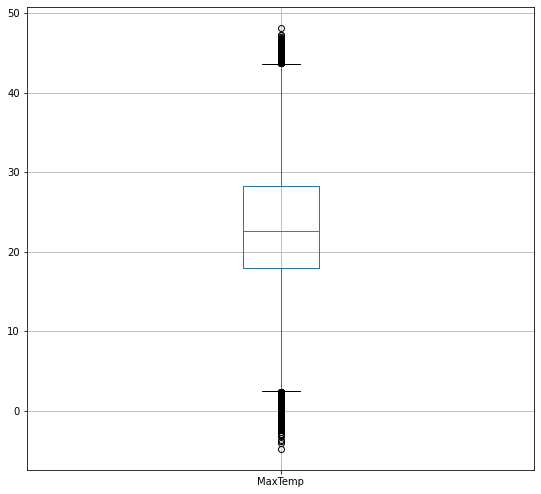

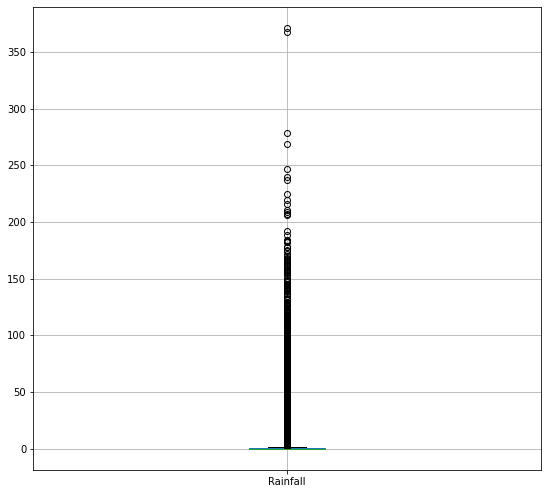

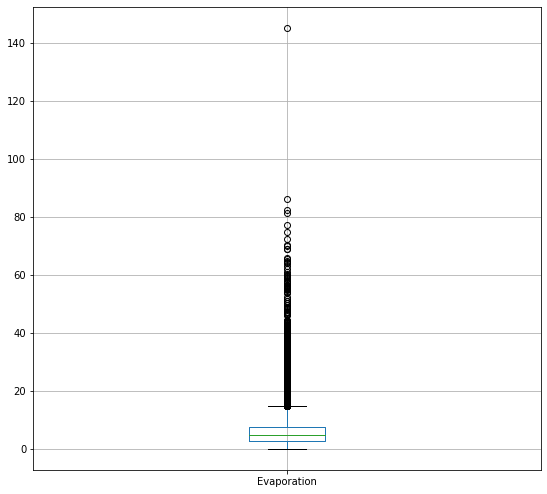

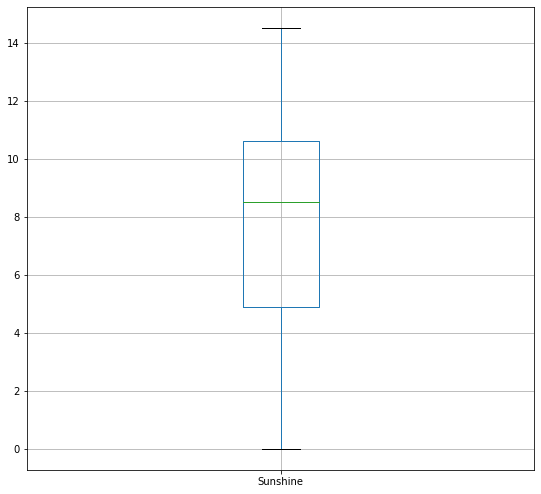

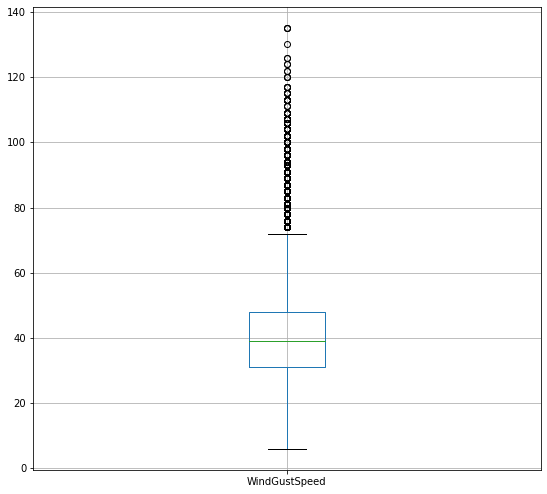

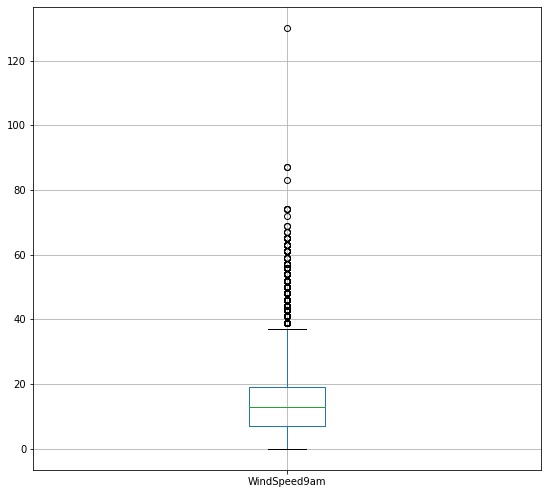

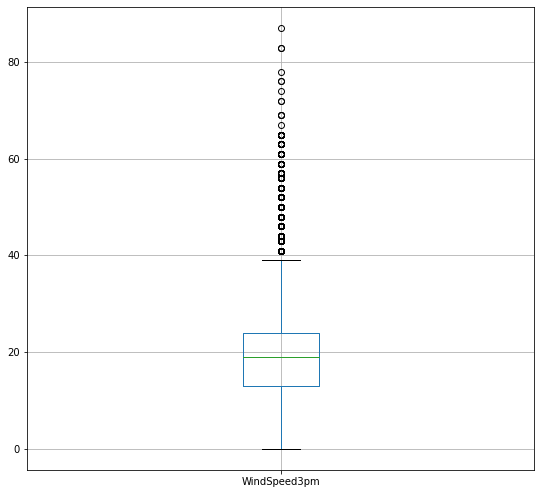

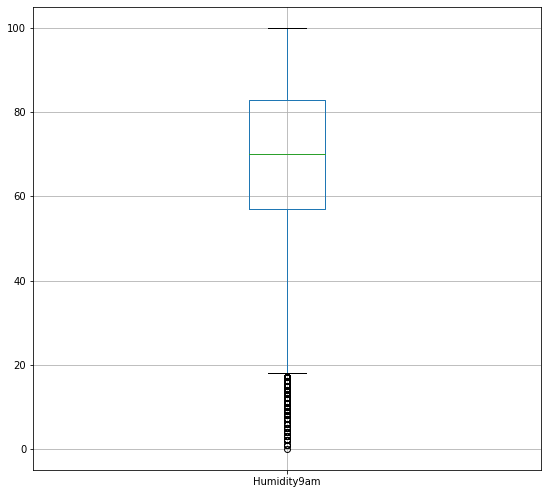

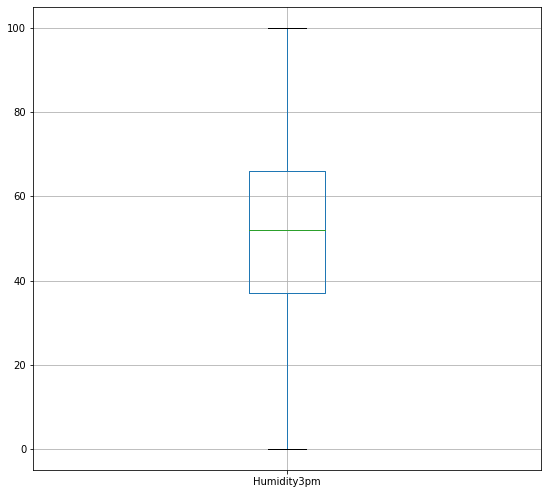

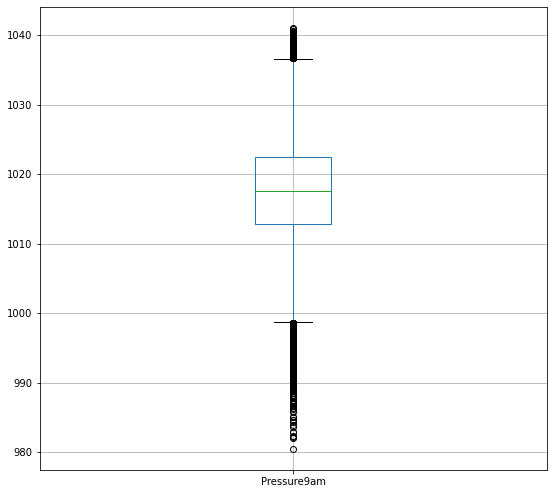

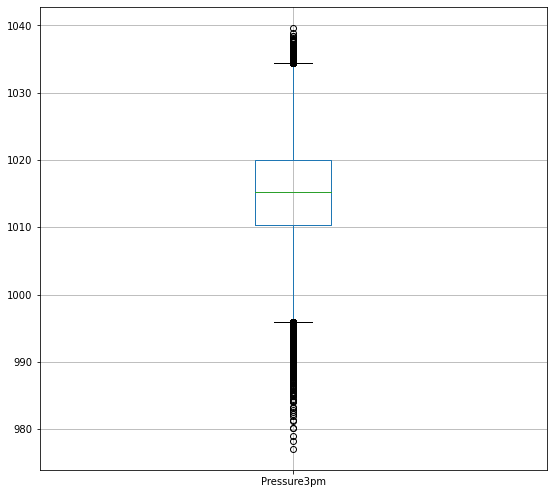

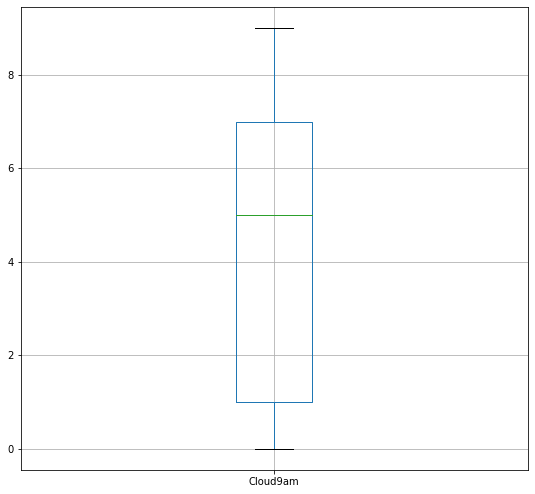

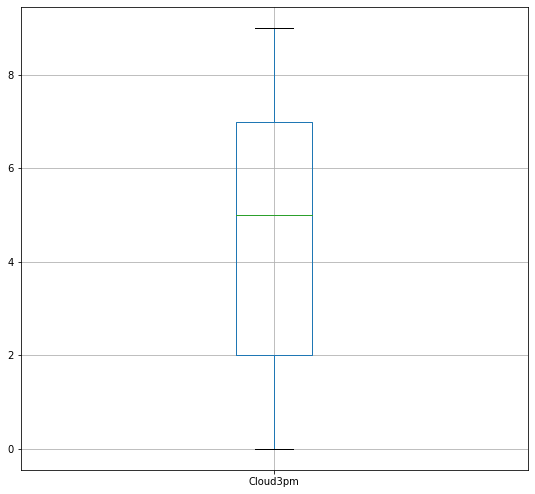

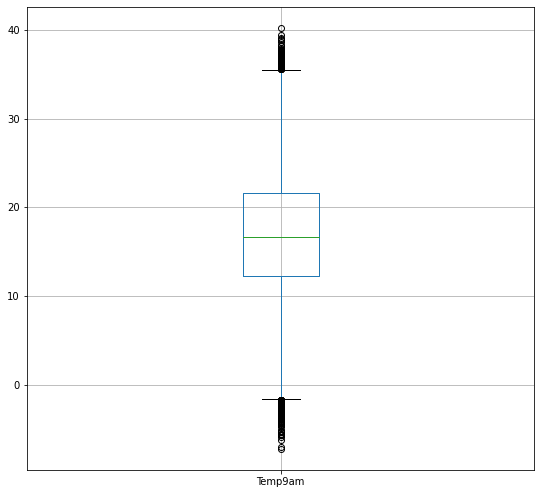

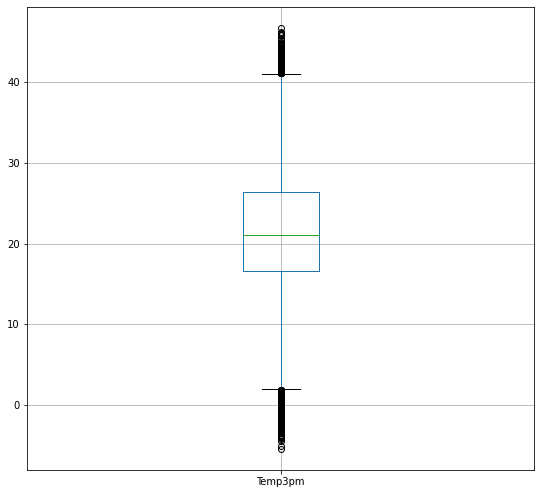

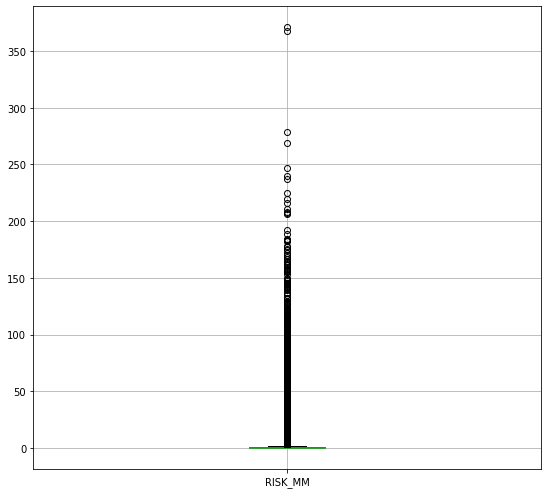

In [9]:
##REVISION DE DATAFRAME NUMERICO PARA VISUALIZAR LA DISTRIBUCION DE LOS DATOS Y BUSQUEDA DE OUTLAYERS
for col in df_num:
  plt.figure(figsize=(20,80))
  plt.subplot(8,2,1)
  fig= dataframe1.boxplot(column=col)

In [ ]:
df_num.hist(bins=10, figsize = (20,15))
plt.show()

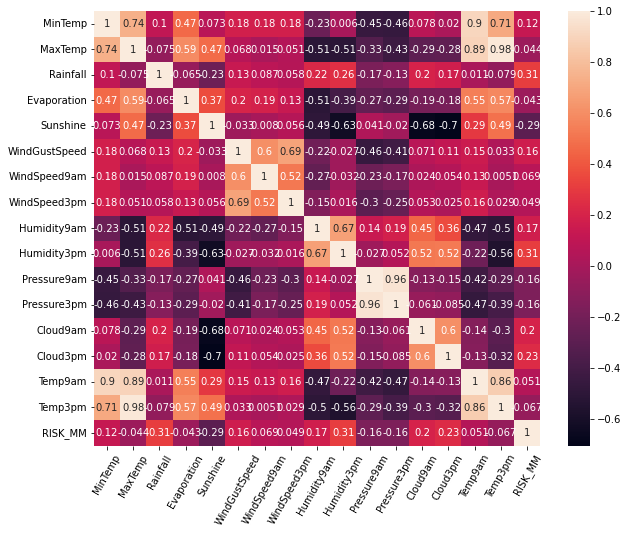

In [10]:
##MATRIZDECORRELLACION DF NUMERICO
plt.figure(figsize=(10,8))
matriz=sns.heatmap(df_num.corr(),annot=True)
matriz.set_xticklabels(matriz.get_xticklabels(),rotation=60)
plt.show()

In [11]:
#VISUALIZACION VALORES NULOS
for feature in dataframe1.columns:
    print('Total de valores nulos de', feature, '=', dataframe1[feature].isna().sum())

Total de valores nulos de Location = 0
Total de valores nulos de MinTemp = 637
Total de valores nulos de MaxTemp = 322
Total de valores nulos de Rainfall = 1406
Total de valores nulos de Evaporation = 60843
Total de valores nulos de Sunshine = 67816
Total de valores nulos de WindGustDir = 9330
Total de valores nulos de WindGustSpeed = 9270
Total de valores nulos de WindDir9am = 10013
Total de valores nulos de WindDir3pm = 3778
Total de valores nulos de WindSpeed9am = 1348
Total de valores nulos de WindSpeed3pm = 2630
Total de valores nulos de Humidity9am = 1774
Total de valores nulos de Humidity3pm = 3610
Total de valores nulos de Pressure9am = 14014
Total de valores nulos de Pressure3pm = 13981
Total de valores nulos de Cloud9am = 53657
Total de valores nulos de Cloud3pm = 57094
Total de valores nulos de Temp9am = 904
Total de valores nulos de Temp3pm = 2726
Total de valores nulos de RainToday = 1406
Total de valores nulos de RISK_MM = 0
Total de valores nulos de RainTomorrow = 0
Tota

In [12]:
##VISUALIZACION DE PORCENTAJES DE VALORES NULOS
print("PORCENTAJE DE VALORES NULOS")
for col in dataframe1.columns:
    print(col+" : "+str(round(dataframe1[col].isnull().sum()/dataframe1.shape[0]*100,2))+"%")

PORCENTAJE DE VALORES NULOS
Location : 0.0%
MinTemp : 0.45%
MaxTemp : 0.23%
Rainfall : 0.99%
Evaporation : 42.79%
Sunshine : 47.69%
WindGustDir : 6.56%
WindGustSpeed : 6.52%
WindDir9am : 7.04%
WindDir3pm : 2.66%
WindSpeed9am : 0.95%
WindSpeed3pm : 1.85%
Humidity9am : 1.25%
Humidity3pm : 2.54%
Pressure9am : 9.86%
Pressure3pm : 9.83%
Cloud9am : 37.74%
Cloud3pm : 40.15%
Temp9am : 0.64%
Temp3pm : 1.92%
RainToday : 0.99%
RISK_MM : 0.0%
RainTomorrow : 0.0%
Month : 0.0%
Estacion : 0.0%


In [13]:
##CREACION DATAFRAME 2 PARA TRATAMIENTO DE DATOS
data_frame2 = dataframe1

In [14]:
##ELIMINACION DE COLUMNAS QUE CUENTAN CON UN 30% O MÁS DE VALORES NULOS.
data_frame2.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1,inplace=True)


In [15]:
##TRATAMIENTO VALORES NULL
median_MinTemp = data_frame2['MinTemp'].median()
data_frame2['MinTemp'] = data_frame2['MinTemp'].fillna(median_MinTemp ) 

median_MaxTemp = data_frame2['MaxTemp'].median()
data_frame2['MaxTemp'] = data_frame2['MaxTemp'].fillna(median_MaxTemp) 

median_Rainfall = data_frame2['Rainfall'].median()
data_frame2['Rainfall'] = data_frame2['Rainfall'].fillna(median_Rainfall) 

median_WindGustSpeed = data_frame2['WindGustSpeed'].median()
data_frame2['WindGustSpeed'] = data_frame2['WindGustSpeed'].fillna(median_WindGustSpeed)

median_WindSpeed9am = data_frame2['WindSpeed9am'].median()
data_frame2['WindSpeed9am'] = data_frame2['WindSpeed9am'].fillna(median_WindSpeed9am)

median_WindSpeed3pm = data_frame2['WindSpeed3pm'].median()
data_frame2['WindSpeed3pm'] = data_frame2['WindSpeed3pm'].fillna(median_WindSpeed3pm) 

median_Humidity9am = data_frame2['Humidity9am'].median()
data_frame2['Humidity9am'] = data_frame2['Humidity9am'].fillna(median_Humidity9am)

median_Humidity3pm = data_frame2['Humidity3pm'].median()
data_frame2['Humidity3pm'] = data_frame2['Humidity3pm'].fillna(median_Humidity3pm) 

median_Pressure9am = data_frame2['Pressure9am'].median()
data_frame2['Pressure9am'] = data_frame2['Pressure9am'].fillna(median_Pressure9am) 

median_Pressure3pm = data_frame2['Pressure3pm'].median()
data_frame2['Pressure3pm'] = data_frame2['Pressure3pm'].fillna(median_Pressure3pm) 


median_Temp9am = data_frame2['Temp9am'].median()
data_frame2['Temp9am'] = data_frame2['Temp9am'].fillna(median_Temp9am) 

median_Temp3pm = data_frame2['Temp3pm'].median()
data_frame2['Temp3pm'] = data_frame2['Temp3pm'].fillna(median_Temp3pm) 



##TRANSFORMACIÓN VARIABLE RAIN TODAY EN NUMERICA
data_frame2["RainToday"]= data_frame2["RainToday"].replace("No",0)
data_frame2["RainToday"]= data_frame2["RainToday"].replace("Yes",1)

##REAJUSTE RAINTODAY
data_frame2['RainToday'] = data_frame2['RainToday'].fillna(0)##SI EL DATO ES NULO SE ASUME QUE NO LLOVIÓ

##TRANSFORMACIÓN VARIABLE RAIN TOMORROW EN NUMERICA
data_frame2["RainTomorrow"]= data_frame2["RainTomorrow"].replace("No",0)
data_frame2["RainTomorrow"]= data_frame2["RainTomorrow"].replace("Yes",1)



In [16]:
#VERIFICACIÓN DE CAMBIOS DE VALORES NULOS EN VARIABLES NUMERICAS
for feature in data_frame2.columns:
    print('Total de valores nulos de', feature, '=', data_frame2[feature].isna().sum())

Total de valores nulos de Location = 0
Total de valores nulos de MinTemp = 0
Total de valores nulos de MaxTemp = 0
Total de valores nulos de Rainfall = 0
Total de valores nulos de WindGustDir = 9330
Total de valores nulos de WindGustSpeed = 0
Total de valores nulos de WindDir9am = 10013
Total de valores nulos de WindDir3pm = 3778
Total de valores nulos de WindSpeed9am = 0
Total de valores nulos de WindSpeed3pm = 0
Total de valores nulos de Humidity9am = 0
Total de valores nulos de Humidity3pm = 0
Total de valores nulos de Pressure9am = 0
Total de valores nulos de Pressure3pm = 0
Total de valores nulos de Temp9am = 0
Total de valores nulos de Temp3pm = 0
Total de valores nulos de RainToday = 0
Total de valores nulos de RISK_MM = 0
Total de valores nulos de RainTomorrow = 0
Total de valores nulos de Month = 0
Total de valores nulos de Estacion = 0


In [17]:
##REMPLAZO VALORES NULOS DE VARIABLES CATEGORICAS POR "DESCONOCIDO"
data_frame2['WindGustDir'] = data_frame2['WindGustDir'].fillna("Desconocido")
data_frame2['WindDir9am'] = data_frame2['WindDir9am'].fillna("Desconocido")
data_frame2['WindDir3pm'] = data_frame2['WindDir3pm'].fillna("Desconocido")


In [18]:
#VERIFICACIÓN DE CAMBIOS DE VALORES NULOS EN VARIABLES CATEGORICAS
for feature in data_frame2.columns:
    print('Total de valores nulos de', feature, '=', data_frame2[feature].isna().sum())

Total de valores nulos de Location = 0
Total de valores nulos de MinTemp = 0
Total de valores nulos de MaxTemp = 0
Total de valores nulos de Rainfall = 0
Total de valores nulos de WindGustDir = 0
Total de valores nulos de WindGustSpeed = 0
Total de valores nulos de WindDir9am = 0
Total de valores nulos de WindDir3pm = 0
Total de valores nulos de WindSpeed9am = 0
Total de valores nulos de WindSpeed3pm = 0
Total de valores nulos de Humidity9am = 0
Total de valores nulos de Humidity3pm = 0
Total de valores nulos de Pressure9am = 0
Total de valores nulos de Pressure3pm = 0
Total de valores nulos de Temp9am = 0
Total de valores nulos de Temp3pm = 0
Total de valores nulos de RainToday = 0
Total de valores nulos de RISK_MM = 0
Total de valores nulos de RainTomorrow = 0
Total de valores nulos de Month = 0
Total de valores nulos de Estacion = 0


In [19]:
##ELIMINACION COLUMNAS 
data_frame2.drop(['Location'],axis=1,inplace=True)
data_frame2


,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Month,Estacion
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0,0,12,Verano
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0,0,12,Verano
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0,0,12,Verano
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,1.0,0,12,Verano
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0.2,0,12,Verano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0.0,0.0,0,6,Invierno
142189,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0.0,0.0,0,6,Invierno
142190,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0.0,0.0,0,6,Invierno
142191,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0.0,0.0,0,6,Invierno


In [20]:
##TRANSFORMACION VARIABLES CATEGORICAS
dummy = pd.get_dummies(data_frame2["WindGustDir"], prefix = "WindGustDir")
data_frame2 = data_frame2.drop(["WindGustDir"], axis=1)
data_frame2 = pd.concat([data_frame2, dummy], axis = 1)
data_frame2

dummy = pd.get_dummies(data_frame2["WindDir9am"], prefix = "WindDir9am")
data_frame2 = data_frame2.drop(["WindDir9am"], axis=1)
data_frame2 = pd.concat([data_frame2, dummy], axis = 1)
data_frame2

dummy = pd.get_dummies(data_frame2["WindDir3pm"], prefix = "WindDir3pm")
data_frame2 = data_frame2.drop(["WindDir3pm"], axis=1)
data_frame2 = pd.concat([data_frame2, dummy], axis = 1)
data_frame2

dummy = pd.get_dummies(data_frame2["Estacion"], prefix = "Estacion")
data_frame2 = data_frame2.drop(["Estacion"], axis=1)
data_frame2 = pd.concat([data_frame2, dummy], axis = 1)
data_frame2


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Month,WindGustDir_Desconocido,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_Desconocido,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_Desconocido,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,Estacion_Invierno,Estacion_Otoño,Estacion_Primavera,Estacion_Verano
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,1.0,0,12,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0.2,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0.0,0.0,0,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
142189,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0.0,0.0,0,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
142190,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0.0,0.0,0,6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
142191,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0.0,0.0,0,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [21]:
##CREACION DE VARIABLE TARGET PARA EL TRABAJO MÁS ESCALADO DE DATOS DEBIDO AL DESBALANCEO DE DATOS.
X=data_frame2.drop(['RainTomorrow'], axis=1)
Y=data_frame2['RainTomorrow']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)
X_scaled=pd.DataFrame(scaler.transform(X), 
                      index=X.index,
                     columns=X.columns)

In [22]:
##ENTRENAMIENTO Y RESULTADOS DEL MODELO DE REGRESION LOGISTICA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
xtrain,xtest,ytrain,ytest=train_test_split(X_scaled,Y,test_size=0.2,random_state=50)
lr=LogisticRegression(max_iter=10000)
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)

0.9034407581271867

In [23]:
##ACCUARACY DE REGRESION LOGISTICA
from sklearn.metrics import accuracy_score
ypred_lr=lr.predict(xtest)
accuracy_score(ytest,ypred_lr)

0.9062906571961039

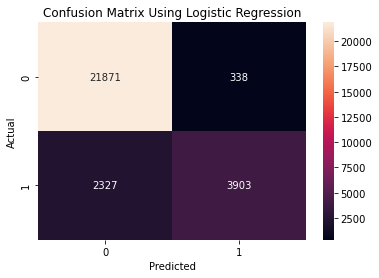

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     22209
           1       0.92      0.63      0.75      6230

    accuracy                           0.91     28439
   macro avg       0.91      0.81      0.84     28439
weighted avg       0.91      0.91      0.90     28439



In [24]:
##MATRIZ DE CONFUSION MAS METRICAS DE REGRESION LOGISTICA
lr_matrix=confusion_matrix(ytest,ypred_lr)
from sklearn.metrics import confusion_matrix
sns.heatmap(lr_matrix,annot=True,fmt='d')
plt.title("Confusion Matrix Using Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_lr))


EL AUC ES : 0.8056328479329631


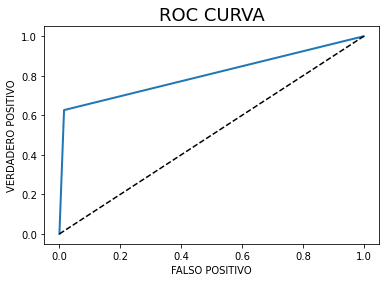

In [25]:
from sklearn import metrics
#calculate AUC of model
auc = metrics.roc_auc_score(ytest,ypred_lr)
#print AUC score
print("EL AUC ES :", auc)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(ytest,ypred_lr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 15
plt.title('ROC CURVA')
plt.xlabel('FALSO POSITIVO')
plt.ylabel('VERDADERO POSITIVO')
plt.show()